# About The Fruit : 'Avocado'

The avocado tree is classified as a member of the flowering plant family Lauraceae. It's origin in South-Central Mexico. The fruit of the plant, also called an avocado. It is also known as an avocado pear or alligator pear. Avocado is a fruit consumed by people heavily in the United States, which is already mentioned in the problem statement.

# Importing The Dataset

In [2]:
#importing required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df=pd.read_csv('avocado.csv')            #opening uploaded csv file of the dataset and converting it into dataframe
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Description of the Dataframe:

Given dataset is of retail scan data for National retail volume (units) and price for the year 2015,2016,2017 and 2018. It is based on actual retail sales of Hass avocados only. There are columns present are as follows.

1)Date: Date of observation with year,month and date included.

2)AveragePrice: The average price of a single avocado.

3)Total Volume: Total no. of avocados sold (which includes grand total of columns '4046', '4225', '4770' and 'TotalBags')

4)4046: total no. of avocados sold with Product Lookup Codes (PLU) 4046 (Note: PLU in the table only for hass avocados)

5)4225: total no. of avocados sold with Product Lookup Codes (PLU) 4225

6)4770: total no. of avocados sold with Product Lookup Codes (PLU) 4770

7)Total Bags: Total no. of units of avocados sold in bags which include 'SmallBags', 'LargeBags' and 'XLargeBags'.

8)Small Bags: Total no. of units of avocados sold in small bags.

9)Large Bags: Total no. of units of avocados sold in large bags.

10)XLarge Bags: Total no. of units of avocados sold in extra large bags.

11)type: coventional or organic type of avocado

12)year: There is a separate year column as well.

13)region: The city or region of the observation as it is multi-outlet retail dataset.

14)Unnamed 0: The column is for indexing purpose only.

# Identification of Problem:

Dataset have numerical-float as well as multiclass nominal string type data. There are 2 types of coumns we can predict one is 'region' and other is 'AveragePrice'.

If we proceed with finding the region and making it the target column, then the problem will be of classification or
if we proceed with finding the AveragePrice and making it the target column, then the problem will be of regression. We will do both step by step.

# Exploratory Data Analysis (EDA)

In [4]:
df.head()    #checking the datafarme

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape   #checking shape of the dataframe

(18249, 14)

There are 18249 rows and 14 columns are present in the given dataframe.

### Handling 'Date' column:

In [6]:
df['Date']=pd.to_datetime(df['Date'])      #converting the column into datetime in order to make accessible with dt function
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df['Day']=df['Date'].dt.day              #extracted day
df['Month']=df['Date'].dt.month          #extracted month
df['Year']=df['Date'].dt.year            #extracted year
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015


## Dropping of the columns:

Here, we can now drop 'Date' and 'year' column as we created new columns of Day, Month and Year separately. 

In [8]:
df11=df.drop(['Date','year'],axis=1)
df11.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015


Further we will drop 'Unnamed: 0' column as it is not relevant to our prediction. As it is just the indexing from 0 to 49 in rotating manner.

In [9]:
df10=df11.drop(['Unnamed: 0'],axis=1)
df10.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015


Now, we will drop 'Small Bags', 'Large Bags' and 'XLarge Bags'as it is summed up into total bags already. We will use Total bags instead directely. As there are less columns to perform PCA, that's why we use this approach of dropping as possible and making sure that it will not loose any relevant data.

In [10]:
df1=df10.drop(['Small Bags','Large Bags','XLarge Bags'],axis=1)
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,Albany,29,11,2015


In [11]:
df1.shape   #checking the shape of new dataframe

(18249, 11)

Now, there are 18249 rows and 11 columns in the new dataset after dropping some columns.

In [12]:
df1.isnull().sum()  #checking the null values 

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
type            0
region          0
Day             0
Month           0
Year            0
dtype: int64

Uptil now no null values present.

In [13]:
df1.info()   #checking null values with datatype information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   region        18249 non-null  object 
 8   Day           18249 non-null  int64  
 9   Month         18249 non-null  int64  
 10  Year          18249 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


type and region column have object(string) datatype. Day, Month and Year columns have integer datatype and other remaining columns have float datatype.

In [14]:
df1['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
df1['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Checked the unique values of object datatype columns in order to check the missing or blank values. Now we can proceed further as there are no missing values in it.

### Making DataFrame for the Nominal Data

In [16]:
df_visualization_nominal=df1[['type','region']].copy()

In [17]:
df_visualization_nominal.columns

Index(['type', 'region'], dtype='object')

# Visualization of the Data:

For the nomial categorical data we will use countplot as it will give the frequency of the classes of the columns.

conventional    9126
organic         9123
Name: type, dtype: int64


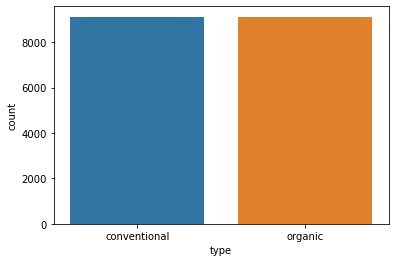

In [18]:
ax = sns.countplot(x="type", data=df_visualization_nominal)
print(df_visualization_nominal["type"].value_counts())

There are almost equal no. of avocados. Conventional type has 9126 in counts and organic type has 9123 in counts.

Pittsburgh             338
NorthernNewEngland     338
Indianapolis           338
Chicago                338
Portland               338
Spokane                338
RichmondNorfolk        338
Jacksonville           338
GreatLakes             338
Nashville              338
Boston                 338
Syracuse               338
DallasFtWorth          338
Sacramento             338
California             338
Northeast              338
HarrisburgScranton     338
RaleighGreensboro      338
Plains                 338
GrandRapids            338
Midsouth               338
NewYork                338
Charlotte              338
Boise                  338
SouthCarolina          338
Southeast              338
Louisville             338
HartfordSpringfield    338
SouthCentral           338
Columbus               338
BuffaloRochester       338
TotalUS                338
Philadelphia           338
MiamiFtLauderdale      338
Tampa                  338
LasVegas               338
Detroit                338
L

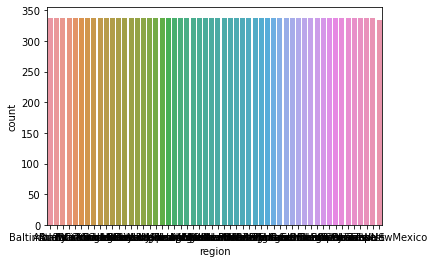

In [19]:
ax = sns.countplot(x="region", data=df_visualization_nominal)
print(df_visualization_nominal["region"].value_counts())

There is only WestTexNewMexico region that has 335 counts, other than that all region have equal count of 338 each.

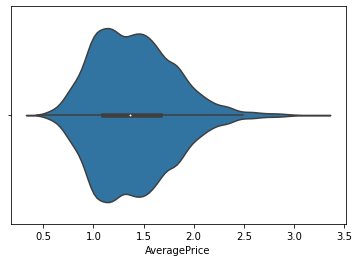

In [20]:
sns.violinplot(x='AveragePrice',data=df1)
plt.show()

The average price's maximum value is fall betweeb 1.0 and 1.7 as violin plot gives the density of the data.

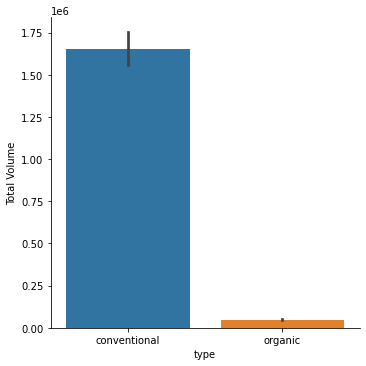

In [21]:
sns.catplot(x='type',y='Total Volume',data=df1,kind='bar')

Coventional type of avocados are dominating in terms of total no. of volumes sold.

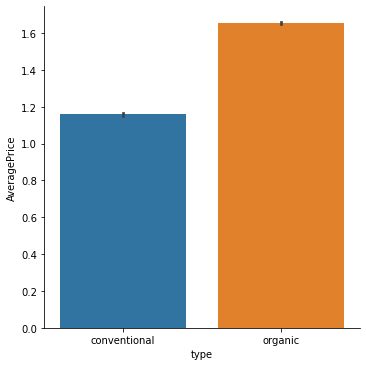

In [22]:
sns.catplot(x='type',y='AveragePrice',data=df1,kind='bar')

The average price for organic avocados are more compared to conventional type.

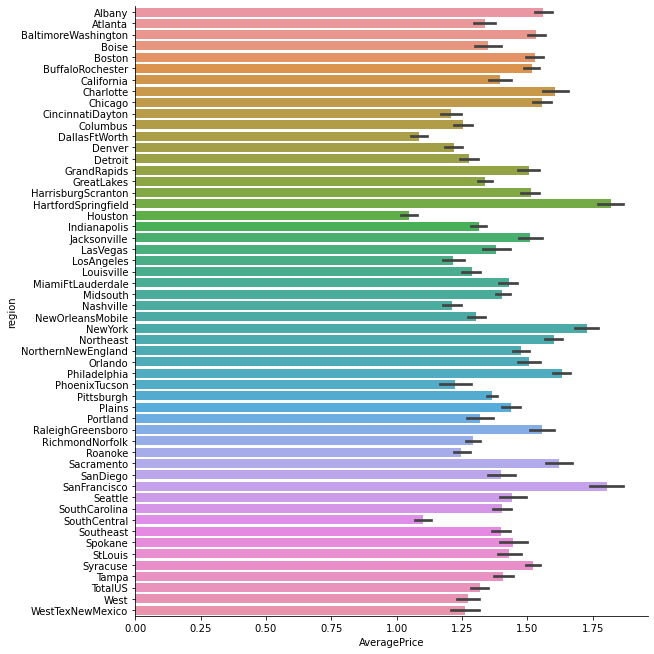

In [23]:
sns.catplot(x='AveragePrice',y='region',data=df1,kind='bar',height=9,aspect=1)

Regions like Huston and SouthCentral have lowest average price (below 1.25). Regions like HartfordSpringfield and SanFrancisco have highest average price (above 1.75).

## Checking Outliers using box-plot :

<AxesSubplot:xlabel='AveragePrice'>

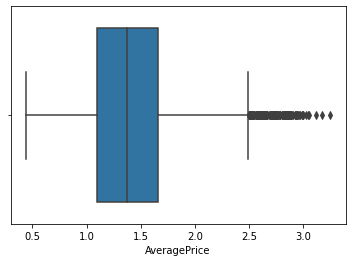

In [24]:
sns.boxplot(x='AveragePrice',data=df1)

Many outliers present in average price column. 

<AxesSubplot:xlabel='Total Volume'>

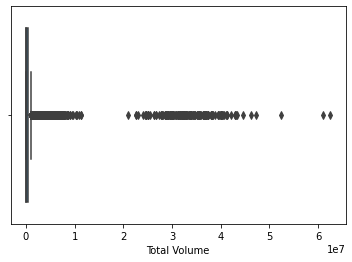

In [25]:
sns.boxplot(x='Total Volume',data=df1)

Too many outliers present in Total Volume column.

<AxesSubplot:xlabel='4046'>

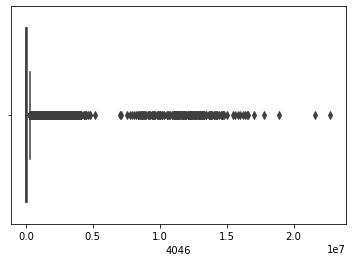

In [26]:
sns.boxplot(x='4046',data=df1)

The data seems alot scattered.

<AxesSubplot:xlabel='Total Bags'>

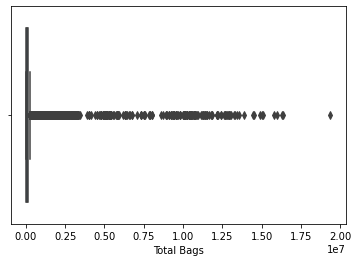

In [27]:
sns.boxplot(x='Total Bags',data=df1)

Here also there are too many outliers. They are more in numbers we will not treat any outlier.

# Encoding of Dataframe

In [28]:
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
df1['type']=labelenc.fit_transform(df1['type'])     #converting string type data to machine readable form in type column
df1['type'].unique()

array([0, 1])

In [29]:
df1['region']=labelenc.fit_transform(df1['region'])   
df1['region'].unique()                             #converting string type data to machine readable form in region column

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

## Statitical Analysis at glance:

In [30]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,0.499918,26.495644,15.662612,6.177215,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,0.500014,15.583788,8.776281,3.534130,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,0.000000,13.000000,8.000000,3.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,0.000000,26.000000,16.000000,6.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,1.000000,40.000000,23.000000,9.000000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.000000,53.000000,31.000000,12.000000,2018.000000


Looking at the statistics table, it has values more than 6 decimal places because of calculation of float data in some columns.

## Correlation of the columns with the target columns:

In [31]:
corr_hmap=df1.corr()
corr_hmap

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,region,Day,Month,Year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,0.615845,-0.011716,0.027386,0.162409,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,-0.232434,0.174176,-0.009747,-0.024689,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,-0.225819,0.192073,-0.010159,-0.025803,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,-0.232289,0.145726,-0.012393,-0.022108,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,-0.210027,0.095252,-0.009009,-0.033424,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,-0.217788,0.175256,-0.004988,-0.022724,0.071552
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,1.000000,-0.000280,-0.000013,-0.000085,-0.000032
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,-0.000280,1.000000,-0.000021,-0.000144,-0.000055
Day,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.000013,-0.000021,1.000000,0.010621,0.004475
Month,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,-0.022724,-0.000085,-0.000144,0.010621,1.000000,-0.177050


Let us have a clear picture of correlation by producing a heatmap for the same.

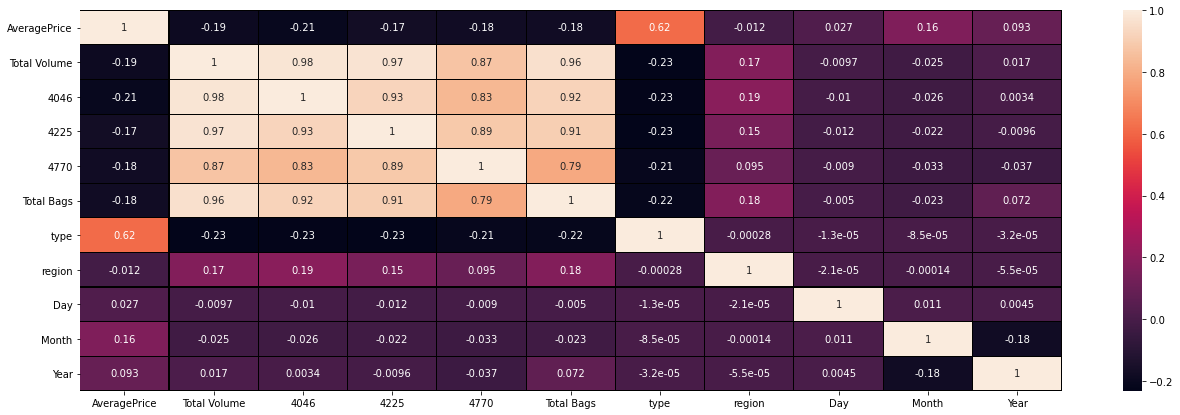

In [32]:
plt.figure(figsize=(22,7))
sns.heatmap(corr_hmap,annot=True,linewidths=0.1,linecolor="black")
plt.show()

We already know there are interrelated columns like Total volumes, Total bags, 4046, 4225, 4770. As these columns are added ultimately in the Total Volume column.

As well as these interrelated columns are slightly negatively correlated with average price, but it is necessary for training the data.

Type column has maximum correlation with the average price column.

## Checking for skewness :

In [33]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
type             0.000329
region           0.000030
Day              0.014310
Month            0.106617
Year             0.215339
dtype: float64

Keeping +/-0.8 as the range for skewness, here are the columns which does not lie within this range.
>> As skewness is upto 8,9 and 10 mark in float datatype columns except AveragePrice column, it seems the dataset has property of skweness itself, we will not treat it as we same did with outliers.

## Separating Independent Variable (x) and Target Variable (y): (For Regression Problem-Predicting Average Price)

In [34]:
x=df1.iloc[:,1:]
x.shape

(18249, 10)

In [35]:
y=df1.iloc[:,0]
y.shape

(18249,)

## Scaling the data using Min-Max Scaler:

Here I am using Min-Max Scaler as the data is skewed in nature, otherwise Standard scaler is preferred for normally distributed data.

Scaling technique should not be applied to target column. You have to use it on the feature columns only.

In [36]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
x_scale=mn.fit_transform(x)
x_scaled=pd.DataFrame(x_scale)
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.999836,-1.700252,1.291857,1.647632,-1.221282
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.999836,-1.700252,0.494231,1.647632,-1.221282
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.999836,-1.700252,-0.303396,1.647632,-1.221282
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.999836,-1.700252,-1.101022,1.647632,-1.221282
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.999836,-1.700252,1.519750,1.364669,-1.221282


## Train Test Split and Finding Best Random State:

In [37]:
import sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [38]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs very well")
        print("At random_state:",i)
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)    

At random state 31 the model performs very well
At random_state: 31
Training r2_score is: 43.601453287036776
Testing r2_score is: 43.55069288342741
At random state 51 the model performs very well
At random_state: 51
Training r2_score is: 43.6021653437685
Testing r2_score is: 43.56780739225734
At random state 59 the model performs very well
At random_state: 59
Training r2_score is: 43.60236315143605
Testing r2_score is: 43.58580608064238
At random state 60 the model performs very well
At random_state: 60
Training r2_score is: 43.594894783396
Testing r2_score is: 43.584595444002225
At random state 67 the model performs very well
At random_state: 67
Training r2_score is: 43.58625870622732
Testing r2_score is: 43.64747658446825
At random state 131 the model performs very well
At random_state: 131
Training r2_score is: 43.597944385300494
Testing r2_score is: 43.57311322619047
At random state 220 the model performs very well
At random_state: 220
Training r2_score is: 43.60297748734547
Testin

Here, we will choose random_state=31, as it is giving same model accuracy in training as well as testing.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=31)

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred_test=lr.predict(x_test)

In [42]:
print('Mean Absolute Error:', mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred_test)))
print('Model Accuracy:', r2_score(y_test,pred_test))

Mean Absolute Error: 0.23242823805636578
Mean Squared Error: 0.09089641705507943
Root Mean Squared Error: 0.3014903266359958
Model Accuracy: 0.4355069288342741


#### Cross Validation Score for Linear Regression:

In [48]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrscore=r2_score(y_test,pred_lr)
for j in range(2,10):
    cvs=cross_val_score(lr,x_scaled,y,cv=j)
    cvsmean=cvs.mean()
    print("At cv:",j)
    print("Cross validation mean score is:",cvsmean*100)
    print("Model accuracy is:",lrscore*100)
    print("\n")

At cv: 2
Cross validation mean score is: -14802.303283221443
Model accuracy is: 43.55069288342741


At cv: 3
Cross validation mean score is: -1435.71103047204
Model accuracy is: 43.55069288342741


At cv: 4
Cross validation mean score is: -1312.4942395958692
Model accuracy is: 43.55069288342741


At cv: 5
Cross validation mean score is: -1206.2900002987335
Model accuracy is: 43.55069288342741


At cv: 6
Cross validation mean score is: -115.09189360773779
Model accuracy is: 43.55069288342741


At cv: 7
Cross validation mean score is: 3.0271201168539856
Model accuracy is: 43.55069288342741


At cv: 8
Cross validation mean score is: -3.265850076323877
Model accuracy is: 43.55069288342741


At cv: 9
Cross validation mean score is: 2.4474685870859014
Model accuracy is: 43.55069288342741




CV score is not good for Linear Regression model, we will look for other algorihms.

### Applying different regression algorithms:

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print(r2_score(y_test,pred_dtr))

0.7744524913616725


### Cross Validation Score for DecisionTreeRegressor:

In [49]:
pred_dtr=dtr.predict(x_test)
from sklearn.model_selection import cross_val_score
dtrscore=r2_score(y_test,pred_dtr)
for j in range(2,10):
    cvsdt=cross_val_score(dtr,x_scaled,y,cv=j)
    cvsmeandt=cvsdt.mean()
    print("At cv:",j)
    print("Cross validation mean score is:",cvsmeandt*100)
    print("Model accuracy is:",dtrscore*100)
    print("\n")

At cv: 2
Cross validation mean score is: -172.4222997365446
Model accuracy is: 77.44524913616725


At cv: 3
Cross validation mean score is: -41.50233360944821
Model accuracy is: 77.44524913616725


At cv: 4
Cross validation mean score is: -59.033777853017554
Model accuracy is: 77.44524913616725


At cv: 5
Cross validation mean score is: -32.18666907879294
Model accuracy is: 77.44524913616725


At cv: 6
Cross validation mean score is: -74.96286692449324
Model accuracy is: 77.44524913616725


At cv: 7
Cross validation mean score is: -27.676349187738463
Model accuracy is: 77.44524913616725


At cv: 8
Cross validation mean score is: -31.336105873679905
Model accuracy is: 77.44524913616725


At cv: 9
Cross validation mean score is: -27.78138114696106
Model accuracy is: 77.44524913616725




CV score is not good for Decision Tree Regressor algorithm.

In [50]:
from sklearn.svm import SVR

In [51]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_svr=svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.5818277124120734


### Cross Validation Score for Support Vector Regressor:

In [54]:
pred_svr=svr.predict(x_test)
from sklearn.model_selection import cross_val_score
svrscore=r2_score(y_test,pred_svr)
for j in range(2,10):
    cvssvr=cross_val_score(svr,x_scaled,y,cv=j)
    cvsmeansvr=cvssvr.mean()
    print("At cv:",j)
    print("Cross validation mean score is:",cvsmeansvr*100)
    print("Model accuracy is:",svrscore*100)
    print("\n")

At cv: 2
Cross validation mean score is: -226.2747518192538
Model accuracy is: 58.18277124120734


At cv: 3
Cross validation mean score is: -35.37322859602989
Model accuracy is: 58.18277124120734


At cv: 4
Cross validation mean score is: -6.383271012986833
Model accuracy is: 58.18277124120734


At cv: 5
Cross validation mean score is: 4.519704583606865
Model accuracy is: 58.18277124120734


At cv: 6
Cross validation mean score is: -11.16639806593266
Model accuracy is: 58.18277124120734


At cv: 7
Cross validation mean score is: 11.355482158482081
Model accuracy is: 58.18277124120734


At cv: 8
Cross validation mean score is: 10.93289380242145
Model accuracy is: 58.18277124120734


At cv: 9
Cross validation mean score is: 16.88474266369992
Model accuracy is: 58.18277124120734




### Model accuracy is 58.18% and at, cv=9 CV mean score is 16.88% for Support Vector Regressor model.

## Applying Ensemble Technique:

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print(r2_score(y_test,pred_rf))

0.8900706543526091


In [61]:
cv_score=cross_val_score(rf,x_scaled,y,cv=9)
cv_mean=cv_score.mean()
cv_mean

0.2821213418850191

### Model accuracy is 89% and at cv=9, CV mean score is 28.21% for Random Forest Regressor model.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print(r2_score(y_test,pred_gb)) 

0.7361006492903801


In [64]:
cv_score=cross_val_score(gb,x_scaled,y,cv=9)
cv_mean=cv_score.mean()
cv_mean

0.42767982530698334

### Model accuracy is 73.61% and at cv=9, CV mean score is 42.76% for Gradient Boosting Regressor model.

In [65]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
addtr=AdaBoostRegressor(n_estimators=50,base_estimator=dtr)
addtr.fit(x_train,y_train)
pred_addtr=addtr.predict(x_test)
print(r2_score(y_test,pred_addtr))

0.9108292593958034


In [68]:
cv_score=cross_val_score(addtr,x_scaled,y,cv=9)
cv_mean=cv_score.mean()
cv_mean

0.29391265995181687

### Model accuracy is 91.08% and at cv=9, CV mean score is 29.39% for Adaboost Gradient Boosting Regressor model using dtr as base estimator.

### Hence, Gradient Boosting Regressor Model is selected for model deployment as it has less difference in Model accuracy (73.61%) and Mean CV (42.76%) value amongst all algorithms.

# Model Saving:

In [70]:
import pickle
filename = 'Avocado_regression.pkl'
pickle.dump(gb, open(filename, 'wb'))

# Conclusion:

In [72]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gb.predict(x_test))
avg_price=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
avg_price.head()

,original,predicted
0,1.13,1.375549
1,1.29,1.427151
2,1.05,1.191276
3,1.25,1.077874
4,1.01,1.220080
